In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [4]:
data = pd.read_csv('restaurants.csv')

In [5]:
data.head()

,id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
0,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,NaN,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.8409,-79.3996,3.0,37,1
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,The Strip,3355 Las Vegas Blvd S,Las Vegas,NV,89109,36.1232,-115.1690,4.0,1451,1
2,--cZ6Hhc9F7VkKXxHMVZSQ,Pio Pio,Dilworth,1408 E Blvd,Charlotte,NC,28203,35.1999,-80.8448,4.0,317,1
3,--DaPTJW3-tB1vP-PfdTEg,Sunnyside Grill,Corso Italia,1218 Saint Clair Avenue W,Toronto,ON,M6E,43.6778,-79.4447,3.5,39,1
4,--FBCX-N37CMYDfs790Bnw,The Bar At Bermuda & St. Rose,Anthem,11624 Bermuda Rd,Henderson,NV,89052,35.9787,-115.1550,3.5,108,1


(array([  348.,  1131.,  2945.,  5448.,  9825., 13387., 13526.,  6516.,
         1492.]),
 array([0.5       , 1.05555556, 1.61111111, 2.16666667, 2.72222222,
        3.27777778, 3.83333333, 4.38888889, 4.94444444, 5.5       ]),
 <a list of 9 Patch objects>)

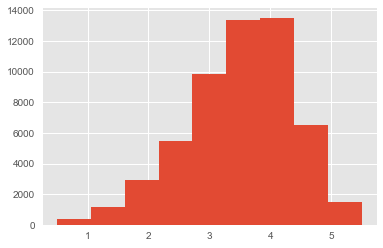

In [6]:
bins = np.linspace(0.5, 5.5, 10)
plt.hist(data['stars'], bins=bins)

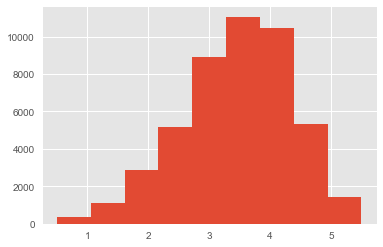

In [7]:
high_review = data[data['review_count'] > 100]
low_review = data[data['review_count'] < 100]

plt.hist(low_review['stars'], bins=bins)
plt.show()

(array([   0.,    6.,   45.,  262.,  902., 2299., 3063., 1165.,   33.]),
 array([0.5       , 1.05555556, 1.61111111, 2.16666667, 2.72222222,
        3.27777778, 3.83333333, 4.38888889, 4.94444444, 5.5       ]),
 <a list of 9 Patch objects>)

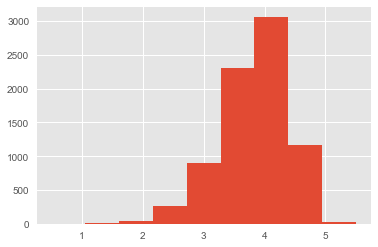

In [8]:
plt.hist(high_review['stars'], bins=bins)

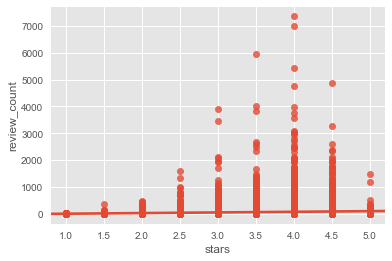

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.regplot(x="stars", y="review_count", data=data, lowess=False, ax=ax)
ax.set_alpha(0.3)
plt.show()

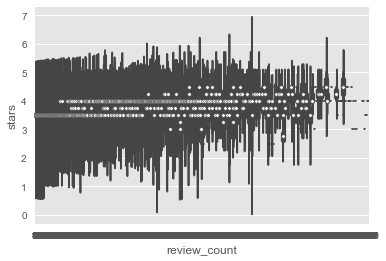

In [10]:
sns.violinplot(y="stars", x="review_count", data=data)

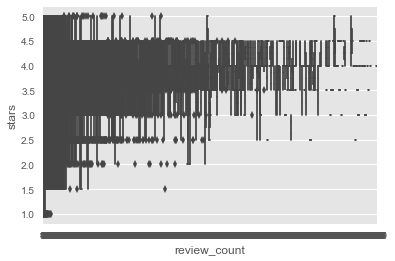

In [11]:
sns.boxplot(x="review_count", y="stars", data=data)

/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


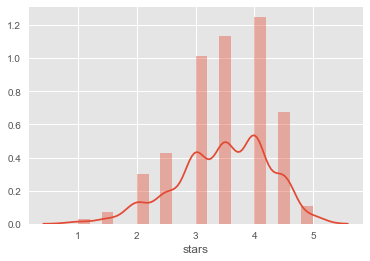

In [64]:
sns.distplot(data["stars"])

* Restaurants with high review count mostly have good ratings
* Restaurants with low review count have a skewed distution of star ratings
* Star Ratings of Restaurants have a skewed distrution

Text(0.5,1,'counts by category')

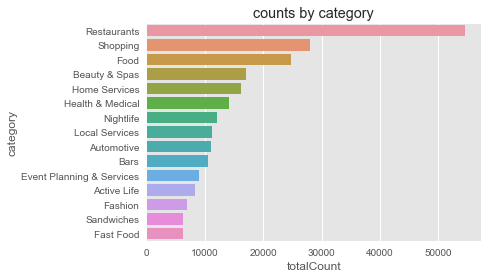

In [13]:
#top counts by category
#we are considering restaurants because restaurant is the major business on the yelp platform
# sns.set_style("whitegrid")
category_counts = pd.read_csv('../category_counts.csv')
df = category_counts.iloc[:15, :]
ax = sns.barplot(x='count(category)', y='category', data=df)
ax.set_xlabel('totalCount')
ax.set_title('counts by category')

Text(0.5,1,'restaurants count by city')

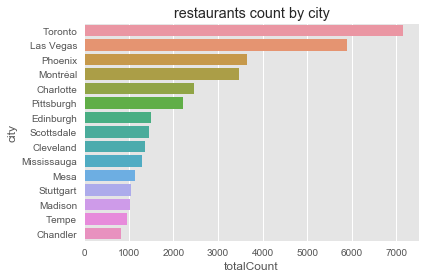

In [15]:
#top counts of restaurants - city level
restaurant_counts = pd.read_csv('../restaurants_city_wise_count.csv')
df = restaurant_counts.iloc[:15, :]
ax = sns.barplot(x='count(city)', y='city', data=df)
ax.set_xlabel('totalCount')
ax.set_title('restaurants count by city')

Text(0.5,1,'review count by restaurants')

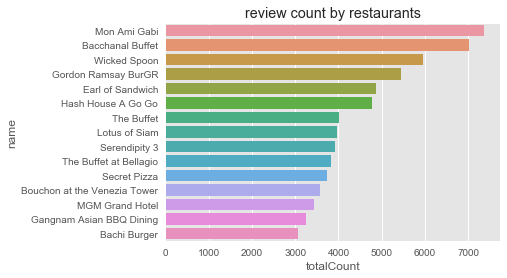

In [16]:
#top counts restaurant reviews by city
review_counts = pd.read_csv('../restaurants.csv')
review_counts.sort_values(by=['review_count'], ascending=False, inplace=True)
df = review_counts.iloc[:15, :]
ax = sns.barplot(x='review_count', y='name', data=df)
ax.set_xlabel('totalCount')
ax.set_title('review count by restaurants')

Text(0.5,1,'review count by city')

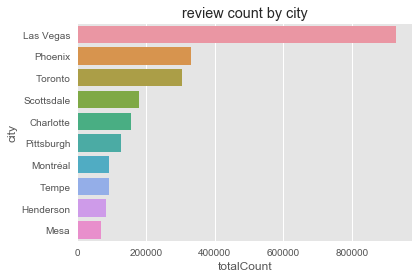

In [17]:
#top counts restaurant reviews by city
review_counts = pd.read_csv('../restaurants.csv')
df = review_counts.groupby('city').agg('sum').sort_values(by=["review_count"], ascending=False).iloc[:10,:]

ax = sns.barplot(x='review_count', y=df.index, data=df)
ax.set_xlabel('totalCount')
ax.set_title('review count by city')

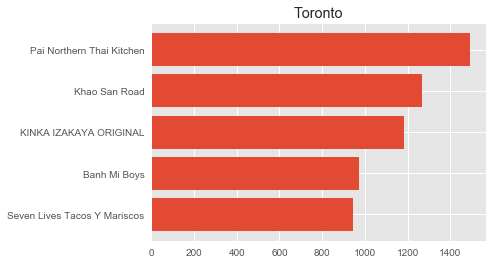

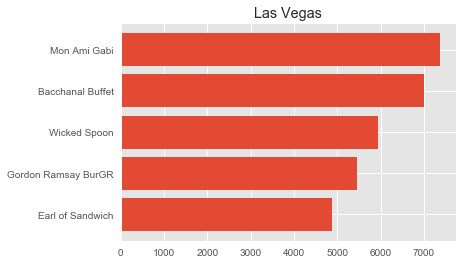

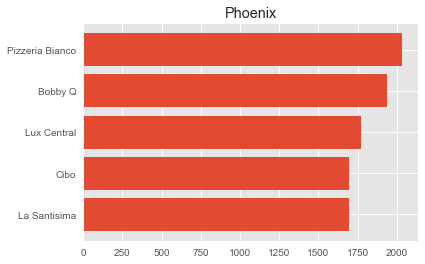

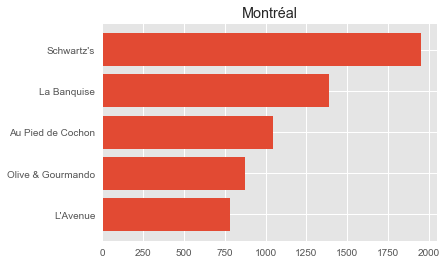

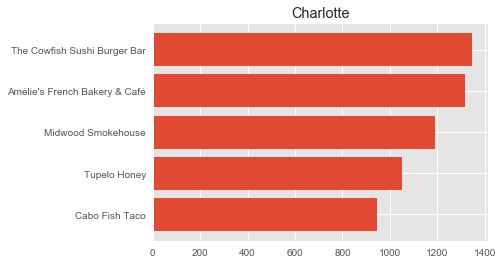

In [19]:
# TOP 5 RESTAURANTS OF TOP 5 CITIES
restaurants = pd.read_csv('../restaurants.csv')
top_cities = list(restaurant_counts.iloc[:5, :]['city'])
restaurants = restaurants[restaurants['city'].isin(top_cities)]
restaurants = restaurants.sort_values(by=["review_count"], ascending=False).groupby(['city']).head(5)
for city in top_cities:
    #plt.hold(True)
    plt.figure()
    temp = restaurants[restaurants["city"]==city].sort_values(by=["review_count"])
    x = list(temp["review_count"])
    y = list(temp["name"])
    y_pos = range(0, len(y))
    plt.barh(y, x)
    plt.title(city)
    #plt.invert_yaxis()
    #plt.set_yticklabels(y)

plt.show()

In [20]:
# review_counts = pd.read_csv('restaurants.csv')
# top_restaurants = list(review_counts.sort_values(by=['review_count'], ascending=False)['name'])[:10]
# review_counts = review_counts[review_counts['name'].isin(top_restaurants)]
# # top_restaurants = ["Chipotle Mexican Grill","McDonald's"]
# for restaurant in top_restaurants:
#     plt.figure()
#     temp = review_counts[review_counts["name"]==restaurant].sort_values(by=["review_count"])
#     x = list(temp["review_count"])
#     y = list(temp["city"])
#     plt.barh(y, x)
#     plt.title(restaurant)
# plt.show()

In [21]:
# reviews = pd.read_html('reviews_html', header=0)[0]
# review_counts = pd.read_csv('restaurants.csv')

# top_restaurants = list(review_counts.sort_values(by=['review_count'], ascending=False)['name'])[:5]
# review_counts = review_counts[review_counts['name'].isin(top_restaurants)]
# top_ids = list(review_counts['id'])
# print(top_ids)


In [22]:
# id="lKq4Qsz13FDcAVgp49uukQ"
# review_counts[review_counts["id"]==id]
# reviews[reviews["business_id"]==id]

In [24]:
reviews = pd.read_html('../mon_reviews.html', header=0)[0]
reviews.head()

,id,business_id,user_id,stars,date,text,useful,funny,cool
0,-1RfHHfP3WaG0gN1v1KWLA,4JNXUYY8wbaaDmk3BPzlWw,-s3ATMWSYnjM2gIwXYkY1w,5,2016-10-10 00:00:00,Thank you Perry for checking on is during our ...,0,0,1
1,-2-LqTqh6i9FhqJNS3xrsw,4JNXUYY8wbaaDmk3BPzlWw,tDlvcvNZtgVstlEH9Cx5Eg,5,2011-02-09 00:00:00,So it was my birthday........... We were seate...,1,1,1
2,-2NfC5Dn7ebKrZwSw-X1jg,4JNXUYY8wbaaDmk3BPzlWw,Ll_jDY55b3U8QdGu4As-2A,5,2009-09-11 00:00:00,Great oysters? Check. Good bread? Check. I got...,0,0,0
3,-32pNTk6uUjML6WLaJeP9g,4JNXUYY8wbaaDmk3BPzlWw,kQlHI4rw1pbDPK-SzpkwNQ,3,2010-02-17 00:00:00,"I had higher expectation for this place, but w...",0,0,0
4,-3AEuQMW6ifRnKev2NGTZQ,4JNXUYY8wbaaDmk3BPzlWw,oY4NZbBXAw4GHgI9GmHIQg,5,2013-08-09 00:00:00,The Bf and I dined here on July 13 and had inv...,1,0,0


In [58]:
reviews = pd.read_html('../mon_reviews.html', header=0)[0]

[Text(0,0,'2015-1'),
 Text(0,0,'2015-2'),
 Text(0,0,'2015-3'),
 Text(0,0,'2015-4'),
 Text(0,0,'2015-5'),
 Text(0,0,'2015-6'),
 Text(0,0,'2015-7'),
 Text(0,0,'2015-8'),
 Text(0,0,'2015-9'),
 Text(0,0,'2015-10'),
 Text(0,0,'2015-11'),
 Text(0,0,'2015-12'),
 Text(0,0,'2016-1'),
 Text(0,0,'2016-2'),
 Text(0,0,'2016-3'),
 Text(0,0,'2016-4'),
 Text(0,0,'2016-5'),
 Text(0,0,'2016-6'),
 Text(0,0,'2016-7'),
 Text(0,0,'2016-8'),
 Text(0,0,'2016-9'),
 Text(0,0,'2016-10'),
 Text(0,0,'2016-11'),
 Text(0,0,'2016-12'),
 Text(0,0,'2017-1'),
 Text(0,0,'2017-2'),
 Text(0,0,'2017-3'),
 Text(0,0,'2017-4'),
 Text(0,0,'2017-5'),
 Text(0,0,'2017-6'),
 Text(0,0,'2017-7'),
 Text(0,0,'2017-8'),
 Text(0,0,'2017-9'),
 Text(0,0,'2017-10'),
 Text(0,0,'2017-11'),
 Text(0,0,'2017-12')]

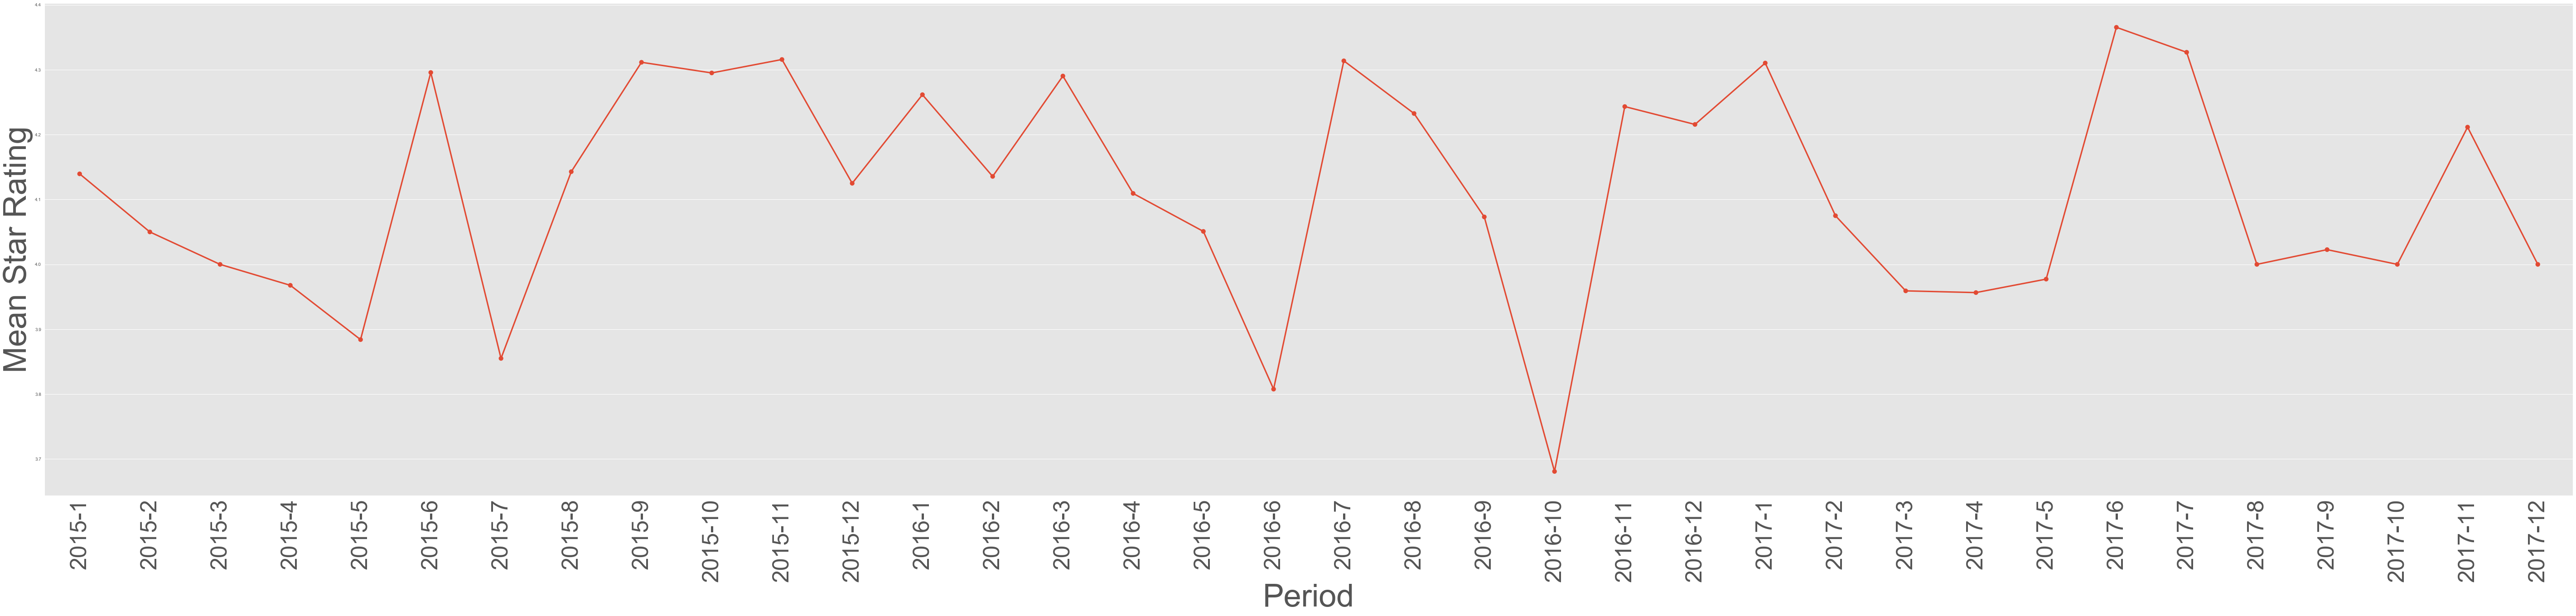

In [92]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['year'], reviews['month'] = reviews['date'].dt.year, reviews['date'].dt.month
reviews = reviews[reviews['year']>=2015]
mean_stars = reviews.groupby(['year', 'month'], as_index=False).mean()
mean_stars1 = reviews.groupby(['year', 'month'], as_index=False)['stars'].agg({"mean_score": "mean"})
mean_stars1['period'] = mean_stars1['year'].astype('str').str.cat(mean_stars1['month'].astype('str'), sep='-')
plt.subplots(figsize=(100,20))
ax = sns.pointplot(x='period', y='mean_score', data=mean_stars1)
# ax.tick_params(labelsize=42)
ax.set_xlabel("Period",fontsize=70)
ax.set_ylabel("Mean Star Rating",fontsize=70)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=50)